# **Project Name: Big Mart Sales Prediction**

---
**Team Members**

---



**Shahoriar fahim**                    

**ID:** 2018-1-60-041


**Fatematuz Zohara**

**ID:** 2018-1-60-230


**Khandaker Bariul Alam Udoy**               

**ID:** 2018-1-60-204


**Nushra Tul Zannat**

**ID:** 2018-1-60-071

#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from xgboost import XGBRegressor
from sklearn import metrics

#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/475_Final Project /Dataset/BMS.csv')

In [ ]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


#Pre-Processing and Analysis of Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Data Cleaning**

- Handling Missing Values

In [ ]:
#checking for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#updating any missing values (only works for numerical values) with values close to their cells above and below
#only column 1 (Item_weight) has missing values that are numerical, so update occurs in Column 1
df = df.interpolate()

In [ ]:
mode_of_OutS_based_OutT = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_OutS_based_OutT)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [ ]:
missing = df['Outlet_Size'].isnull()   
print(missing)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
#updating missing values for Outlet_size
df.loc[missing, 'Outlet_Size'] = df.loc[missing,'Outlet_Type'].apply(lambda x: mode_of_OutS_based_OutT[x])

In [ ]:
#checking again for missing values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- Merging data that refer to the same value but has different attribute name

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Exploratory Data Analysis**

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.831222,0.066132,140.992782,1997.831867,2181.288914
std,4.445074,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.000000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.600000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
sns.set()

Distribution of the Numerical Features 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


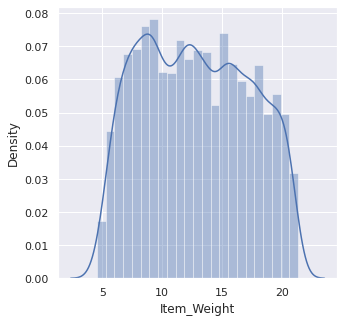

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


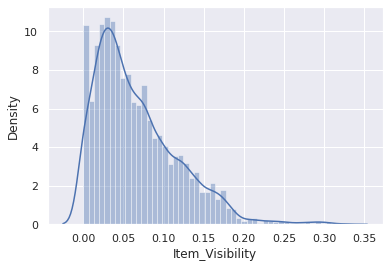

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


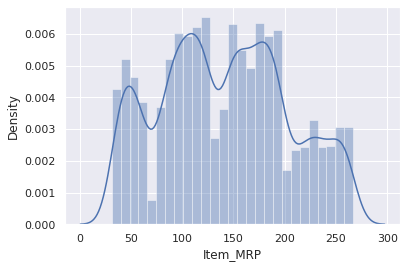

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


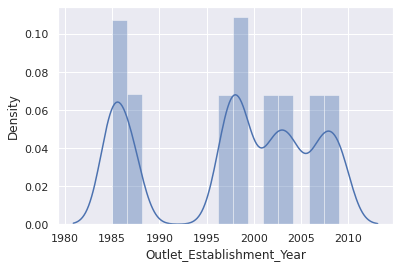

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


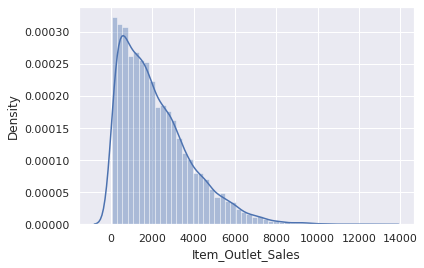

In [ ]:
plt.figure(figsize=(5,5))
for i in df.describe().columns:
  sns.distplot(df[i])
  plt.show()

Distribution of the Categorical Features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


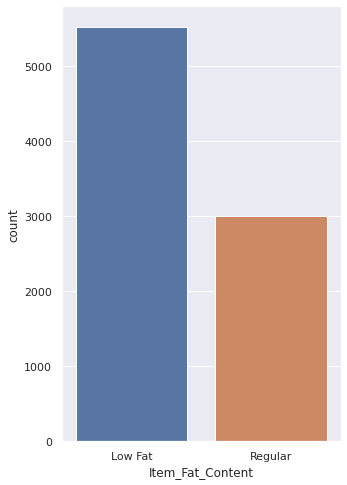

In [ ]:
plt.figure(figsize=(5,8))
sns.countplot(df.Item_Fat_Content)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


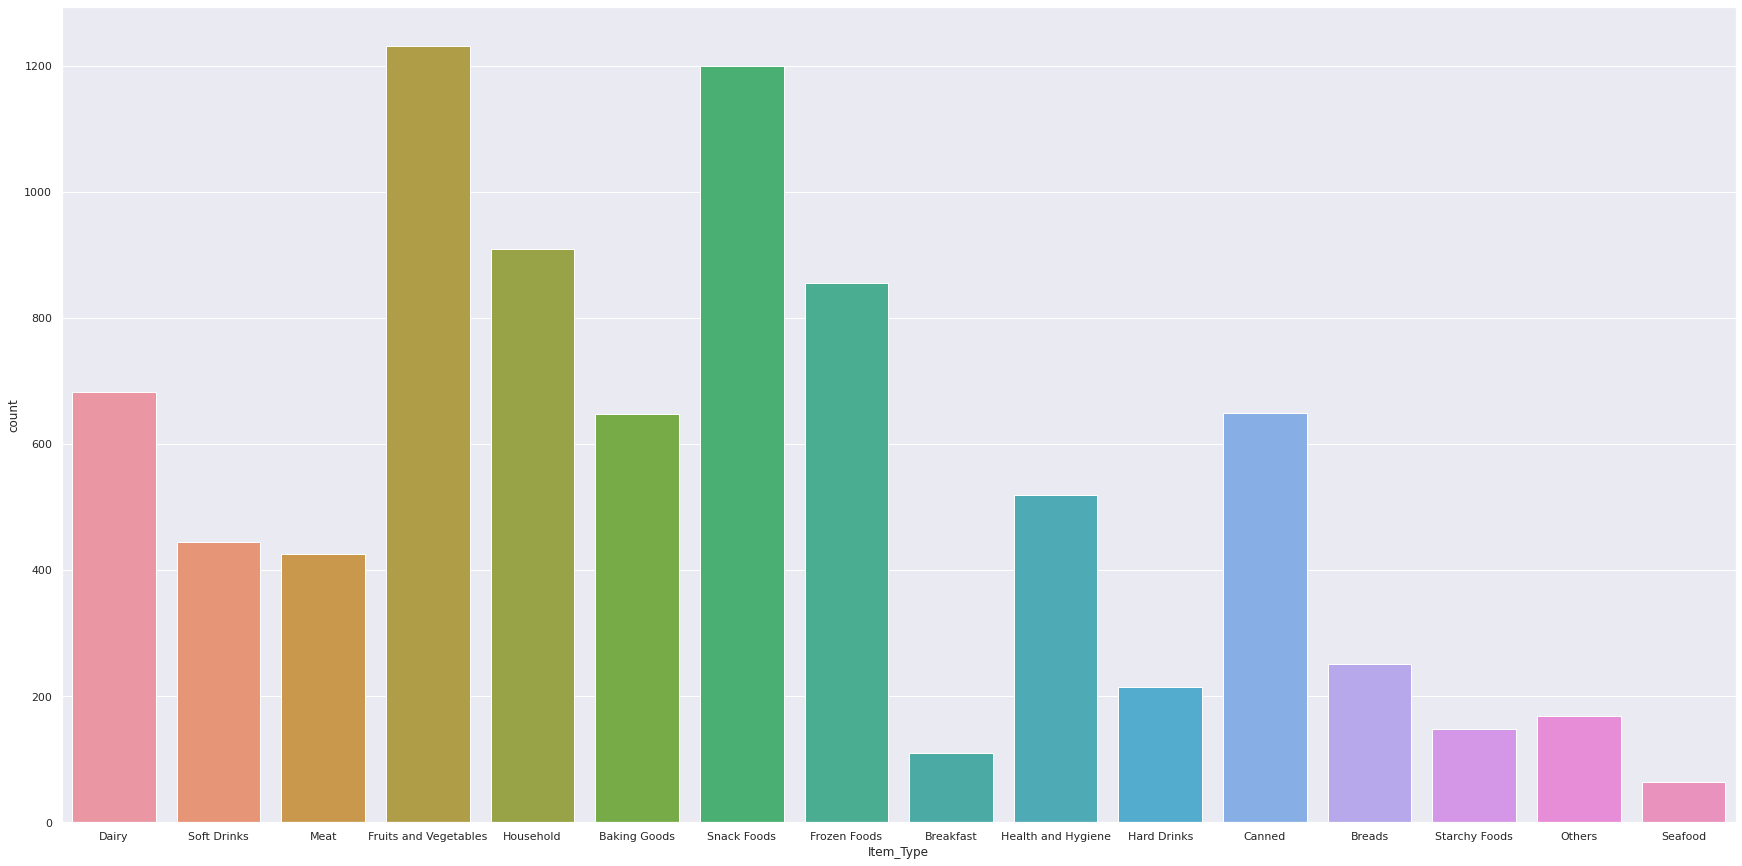

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(df.Item_Type)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


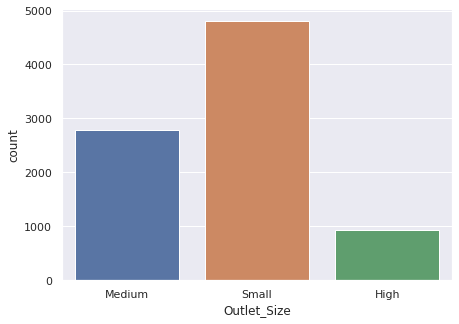

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(df.Outlet_Size)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


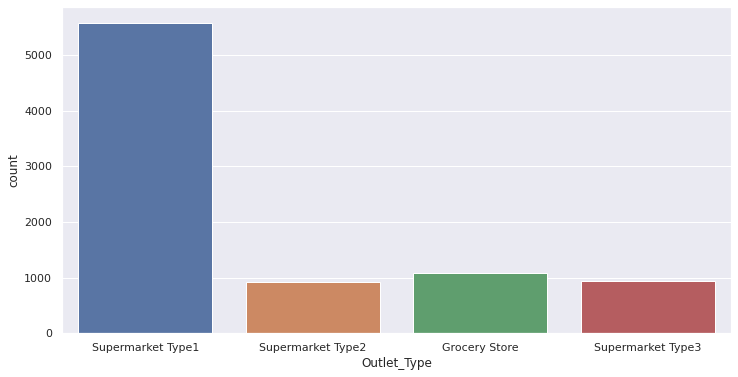

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df.Outlet_Type)
plt.show()

**Data Transformation**

Converting String values to Int values

In [ ]:
L_en = LabelEncoder()

In [ ]:
df['Item_Identifier'] = L_en.fit_transform(df['Item_Identifier'])
df
df['Item_Fat_Content'] = L_en.fit_transform(df['Item_Fat_Content'])
df
df['Item_Type'] = L_en.fit_transform(df['Item_Type'])
df
df['Outlet_Identifier'] = L_en.fit_transform(df['Outlet_Identifier'])
df
df['Outlet_Size'] = L_en.fit_transform(df['Outlet_Size'])
df
df['Outlet_Location_Type'] = L_en.fit_transform(df['Outlet_Location_Type'])
df
df['Outlet_Type'] = L_en.fit_transform(df['Outlet_Type'])

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


#Splitting Dataset for training and testing

In [ ]:
X = df.drop(columns = 'Item_Outlet_Sales', axis = 'columns') #features
Y = df['Item_Outlet_Sales'] #target

In [ ]:
print(X)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 11 columns]


In [ ]:
print(Y)
Y.value_counts()

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

**Using KFold to split the data**

In [ ]:
kf = KFold(n_splits = 6)

In [ ]:
i = 1
for train_set, test_set in kf.split(X = X):
  print("Iteration ", i)
  print("Training fold: ", train_set, " have ", len(train_set), " data")
  print("Testing fold: ", test_set, " have ", len(test_set), " data")
  print("-------------------------------------------------")
  i += 1

Iteration  1
Training fold:  [1421 1422 1423 ... 8520 8521 8522]  have  7102  data
Testing fold:  [   0    1    2 ... 1418 1419 1420]  have  1421  data
-------------------------------------------------
Iteration  2
Training fold:  [   0    1    2 ... 8520 8521 8522]  have  7102  data
Testing fold:  [1421 1422 1423 ... 2839 2840 2841]  have  1421  data
-------------------------------------------------
Iteration  3
Training fold:  [   0    1    2 ... 8520 8521 8522]  have  7102  data
Testing fold:  [2842 2843 2844 ... 4260 4261 4262]  have  1421  data
-------------------------------------------------
Iteration  4
Training fold:  [   0    1    2 ... 8520 8521 8522]  have  7103  data
Testing fold:  [4263 4264 4265 ... 5680 5681 5682]  have  1420  data
-------------------------------------------------
Iteration  5
Training fold:  [   0    1    2 ... 8520 8521 8522]  have  7103  data
Testing fold:  [5683 5684 5685 ... 7100 7101 7102]  have  1420  data
----------------------------------------

#Building ML model using XGBoost

In [ ]:
XGB_model = XGBRegressor(n_estimators = 100, learning_rate=0.06)

In [ ]:
for train_set, test_set in kf.split(X):
  XGB_model.fit(X.loc[train_set], Y[train_set])

[14:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:02:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:02:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:02:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:02:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#Evaluation

In [ ]:
i = 0
scores_sum = 0
scores = []
for train_set, test_set in kf.split(X):
  each_score = XGB_model.score(X.loc[train_set], Y[train_set])
  scores.append(each_score)
  scores_sum = scores_sum + each_score
  i += 1

In [ ]:
print(scores_sum)
scores

3.7169263253417975


[0.6174880067683993,
 0.6212518249136586,
 0.6228304140046456,
 0.6158836458116026,
 0.6170032653645189,
 0.6224691684789727]

In [ ]:
accuracy = scores_sum/6
print("Accuracy:", accuracy * 100)

Accuracy: 61.94877208902996
